In [79]:
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime

In [111]:
stop_events = pd.read_csv("../stop_events.csv", parse_dates=[1, 5, 6, 18, 19])

stop_events.head()



,id,date,stopCode,aimedArrival,aimedDeparture,actualArrival,actualDeparture,vehicle,workid,patternId,publicName,scheduledStart,workCode,tripCode,match,prev_stopCode,prev_aimedArrival,prev_aimedDeparture,prev_actualArrival,prev_actualDeparture
0,167_591_2,2018-09-18,1290BOA05876,2018-09-18 07:34:00,2018-09-18 07:34:00,NaT,NaT,0,167_591_2,167_16,1,27180,105,13.0,True,1290BOB20387,2018-09-18 07:33:00,2018-09-18 07:33:00,NaT,NaT
1,167_591_2,2018-09-18,1290BOB20449,2018-09-18 07:35:00,2018-09-18 07:35:00,NaT,NaT,0,167_591_2,167_16,1,27180,105,13.0,True,1290BOA05876,2018-09-18 07:34:00,2018-09-18 07:34:00,NaT,NaT
2,167_591_2,2018-09-18,1290BOB20452,2018-09-18 07:36:00,2018-09-18 07:36:00,NaT,NaT,0,167_591_2,167_16,1,27180,105,13.0,True,1290BOB20449,2018-09-18 07:35:00,2018-09-18 07:35:00,NaT,NaT
3,167_591_2,2018-09-18,1290BOB20413,2018-09-18 07:38:00,2018-09-18 07:38:00,NaT,NaT,0,167_591_2,167_16,1,27180,105,13.0,True,1290BOB20452,2018-09-18 07:36:00,2018-09-18 07:36:00,NaT,NaT
4,167_591_2,2018-09-18,1290BOB20423,2018-09-18 07:39:00,2018-09-18 07:39:00,NaT,NaT,0,167_591_2,167_16,1,27180,105,13.0,True,1290BOB20413,2018-09-18 07:38:00,2018-09-18 07:38:00,NaT,NaT


In [112]:
stop_events["aimedArrival"] = stop_events["aimedArrival"].astype("datetime64[ns]")
stop_events["aimedDeparture"] = stop_events["aimedDeparture"].astype("datetime64[ns]")
stop_events["prev_aimedArrival"] = stop_events["prev_aimedArrival"].astype("datetime64[ns]")
stop_events["prev_aimedDeparture"] = stop_events["prev_aimedDeparture"].astype("datetime64[ns]")

stop_events.head(30)

print(stop_events.shape)

stop_events = stop_events.dropna(axis=0)

# # stop_events = stop_events[stop_events.id != "NaN"]

print(stop_events.shape)

(48850, 20)
(42188, 20)


In [117]:
stop_events.head(5)

,id,date,stopCode,aimedArrival,aimedDeparture,actualArrival,actualDeparture,vehicle,workid,patternId,publicName,scheduledStart,workCode,tripCode,match,prev_stopCode,prev_aimedArrival,prev_aimedDeparture,prev_actualArrival,prev_actualDeparture
2796,167_222_1,2018-09-18,1290BOB20391,2018-09-18 07:55:00,2018-09-18 07:55:00,2018-09-18 07:55:25,2018-09-18 07:57:24,113,167_222_1,167_205,4,28500,406,9.0,True,1290BOB20446,2018-09-18 07:55:00,2018-09-18 07:55:00,2018-09-18 07:58:08,2018-09-18 07:58:37
2797,167_222_1,2018-09-18,1290BOB20449,2018-09-18 07:57:00,2018-09-18 07:57:00,2018-09-18 07:59:26,2018-09-18 07:59:35,113,167_222_1,167_205,4,28500,406,9.0,True,1290BOB20391,2018-09-18 07:55:00,2018-09-18 07:55:00,2018-09-18 07:55:25,2018-09-18 07:57:24
2798,167_222_1,2018-09-18,1290BOB20452,2018-09-18 07:57:00,2018-09-18 07:57:00,2018-09-18 07:59:45,2018-09-18 07:59:51,113,167_222_1,167_205,4,28500,406,9.0,True,1290BOB20449,2018-09-18 07:57:00,2018-09-18 07:57:00,2018-09-18 07:59:26,2018-09-18 07:59:35
2799,167_222_1,2018-09-18,1290BOB20416,2018-09-18 07:59:00,2018-09-18 07:59:00,2018-09-18 08:00:34,2018-09-18 08:01:18,113,167_222_1,167_205,4,28500,406,9.0,True,1290BOB20452,2018-09-18 07:57:00,2018-09-18 07:57:00,2018-09-18 07:59:45,2018-09-18 07:59:51
2800,167_222_1,2018-09-18,1290BOB20420,2018-09-18 08:00:00,2018-09-18 08:00:00,2018-09-18 08:01:48,2018-09-18 08:02:15,113,167_222_1,167_205,4,28500,406,9.0,True,1290BOB20416,2018-09-18 07:59:00,2018-09-18 07:59:00,2018-09-18 08:00:34,2018-09-18 08:01:18


In [116]:
stop_events.loc[stop_events.actualArrival < stop_events.prev_actualDeparture].head(30)

,id,date,stopCode,aimedArrival,aimedDeparture,actualArrival,actualDeparture,vehicle,workid,patternId,publicName,scheduledStart,workCode,tripCode,match,prev_stopCode,prev_aimedArrival,prev_aimedDeparture,prev_actualArrival,prev_actualDeparture
2796,167_222_1,2018-09-18,1290BOB20391,2018-09-18 07:55:00,2018-09-18 07:55:00,2018-09-18 07:55:25,2018-09-18 07:57:24,113,167_222_1,167_205,4,28500,406,9.0,True,1290BOB20446,2018-09-18 07:55:00,2018-09-18 07:55:00,2018-09-18 07:58:08,2018-09-18 07:58:37
2812,167_222_1,2018-09-18,1290DOB21060,2018-09-18 08:11:00,2018-09-18 08:11:00,2018-09-18 08:11:55,2018-09-18 08:12:19,113,167_222_1,167_205,4,28500,406,9.0,True,1290DOB21058,2018-09-18 08:11:00,2018-09-18 08:11:00,2018-09-18 08:12:51,2018-09-18 08:13:12
2844,167_222_2,2018-09-18,1290DOB21123,2018-09-18 08:59:00,2018-09-18 08:59:00,2018-09-18 08:58:57,2018-09-18 08:59:23,113,167_222_2,167_220,4,31320,406,22.0,True,1290DOB21118,2018-09-18 08:59:00,2018-09-18 08:59:00,2018-09-18 08:59:52,2018-09-18 08:59:58
2876,167_222_3,2018-09-18,1290BOB20391,2018-09-18 09:40:00,2018-09-18 09:40:00,2018-09-18 09:40:17,2018-09-18 09:40:46,113,167_222_3,167_227,4a,34800,406,23.0,True,1290BOB20446,2018-09-18 09:40:00,2018-09-18 09:40:00,2018-09-18 09:40:56,2018-09-18 09:41:03
2890,167_222_3,2018-09-18,1290BOA05874,2018-09-18 09:54:00,2018-09-18 09:54:00,2018-09-18 09:53:57,2018-09-18 09:55:22,113,167_222_3,167_227,4a,34800,406,23.0,True,1290DOB21062,2018-09-18 09:54:00,2018-09-18 09:54:00,2018-09-18 09:55:59,2018-09-18 09:56:04
2892,167_222_3,2018-09-18,1290DOB21060,2018-09-18 09:56:00,2018-09-18 09:56:00,2018-09-18 09:57:11,2018-09-18 09:57:17,113,167_222_3,167_227,4a,34800,406,23.0,True,1290DOB21058,2018-09-18 09:56:00,2018-09-18 09:56:00,2018-09-18 09:57:41,2018-09-18 09:58:03
2907,167_222_3,2018-09-18,1290DOB20905,2018-09-18 10:09:00,2018-09-18 10:09:00,2018-09-18 10:08:40,2018-09-18 10:08:45,113,167_222_3,167_227,4a,34800,406,23.0,True,1290DOB20889,2018-09-18 10:09:00,2018-09-18 10:09:00,2018-09-18 10:09:02,2018-09-18 10:09:07
2909,167_222_3,2018-09-18,1290DOB20887,2018-09-18 10:11:00,2018-09-18 10:11:00,2018-09-18 10:09:56,2018-09-18 10:10:51,113,167_222_3,167_227,4a,34800,406,23.0,True,1290BTX38429,2018-09-18 10:11:00,2018-09-18 10:11:00,2018-09-18 10:11:52,2018-09-18 10:11:57
2921,167_222_4,2018-09-18,1290BOB20049,2018-09-18 10:33:00,2018-09-18 10:33:00,2018-09-18 10:32:06,2018-09-18 10:32:16,113,167_222_4,167_235,4a,37800,406,36.0,True,1290BOB20008,2018-09-18 10:33:00,2018-09-18 10:33:00,2018-09-18 10:32:34,2018-09-18 10:32:42
2944,167_222_4,2018-09-18,1290BOA05882,2018-09-18 11:01:00,2018-09-18 11:01:00,2018-09-18 11:01:44,2018-09-18 11:01:53,113,167_222_4,167_235,4a,37800,406,36.0,True,1290DOB21067,2018-09-18 11:01:00,2018-09-18 11:01:00,2018-09-18 11:02:16,2018-09-18 11:02:22


In [40]:
stop_events.dtypes

id                              object
date                    datetime64[ns]
stopCode                        object
aimedArrival            datetime64[ns]
aimedDeparture          datetime64[ns]
actualArrival           datetime64[ns]
actualDeparture         datetime64[ns]
vehicle                          int64
workid                          object
patternId                       object
publicName                      object
scheduledStart                   int64
workCode                         int64
tripCode                       float64
match                             bool
prev_stopCode                   object
prev_aimedArrival       datetime64[ns]
prev_aimedDeparture     datetime64[ns]
prev_actualArrival      datetime64[ns]
prev_actualDeparture    datetime64[ns]
dtype: object

In [73]:
dwell_time_dest = (stop_events.actualDeparture - stop_events.actualArrival).astype('timedelta64[s]')
dwell_time_prev = (stop_events.prev_actualDeparture - stop_events.prev_actualArrival).astype('timedelta64[s]')
journey_time = (stop_events.actualArrival - stop_events.prev_actualDeparture).astype('timedelta64[s]')
journey_time_inc_prev_dwell = (stop_events.actualArrival - stop_events.prev_actualArrival).astype('timedelta64[s]')
journey_time_inc_dest_dwell = (stop_events.actualDeparture - stop_events.prev_actualDeparture).astype('timedelta64[s]')

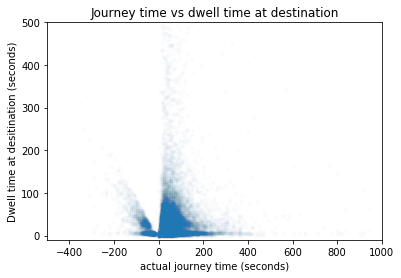

In [74]:
plt.scatter(journey_time, dwell_time_dest, marker=".", alpha=0.01)
plt.xlabel("actual journey time (seconds)")
plt.ylabel("Dwell time at destination (seconds)")
plt.title("Journey time vs dwell time at destination")
plt.xlim(-500, 1000)
plt.ylim(-10, 500)
plt.show()

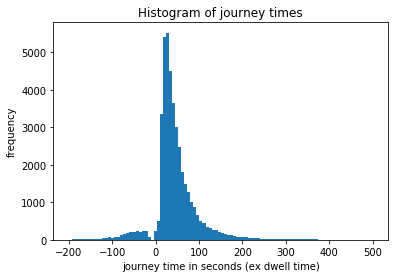

In [72]:
plt.hist(journey_time, bins=100, range=(-200, 500))
plt.xlabel("journey time in seconds (ex dwell time)")
plt.ylabel("frequency")
plt.title("Histogram of journey times")
plt.show()

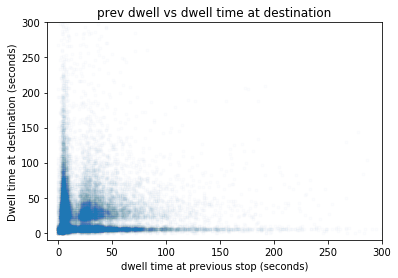

In [76]:
plt.scatter(dwell_time_prev, dwell_time_dest, marker=".", alpha=0.01)
plt.xlabel("dwell time at previous stop (seconds)")
plt.ylabel("Dwell time at destination (seconds)")
plt.title("prev dwell vs dwell time at destination")
plt.xlim(-10, 300)
plt.ylim(-10, 300)
plt.show()

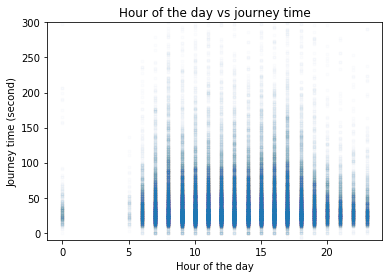

In [97]:
plt.scatter(stop_events['actualArrival'].dt.hour, journey_time, marker=".", alpha=0.01)
plt.xlabel("Hour of the day")
plt.ylabel("Journey time (second)")
plt.title("Hour of the day vs journey time")
# plt.xlim(-10, 300)
plt.ylim(-10, 300)
plt.show()

In [119]:
patterns = pd.read_csv("../Trapeze_Data/Patterns.csv")

In [128]:
# patterns.groupby(['id', 'stopCode']).size().sort_values(ascending=False)

patterns.groupby(['id', 'stopCode']).filter(lambda x: len(x) > 1) 


,id,sequence,stopCode,timingPoint
2,167_16,3,1290BOB20387,1
3,167_16,4,1290BOB20387,1
78,167_38,37,1290BOB20403,1
79,167_38,38,1290BOB20403,1
185,167_125,29,1290BOB20387,1
186,167_125,30,1290BOB20387,1
350,167_44,37,1290BOB20403,1
351,167_44,38,1290BOB20403,1
420,167_42,37,1290BOB20403,1
421,167_42,38,1290BOB20403,1
